In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean

In [2]:
df2019 = pd.read_csv('BC_2019_Reporting_Data.csv')
df2020 = pd.read_csv('BC_2020_Reporting_Data.csv')
df2021 = pd.read_csv('BC_2021_Reporting_Data.csv')
df2022 = pd.read_csv('BC_2022_Reporting_Data.csv')
df2023 = pd.read_csv('BC_2023_Reporting_Data.csv')
df2024 = pd.read_csv('BC_2024_Reporting_Data.csv', low_memory=False)

data_array = [df2019, df2020, df2021, df2022, df2023, df2024]

Imported data

In [3]:
pd.set_option('display.max_columns', 47)

In [4]:
pd.set_option('display.max_rows', 20)

In [5]:
#df2020

In [6]:
#df2022.columns

In [7]:
for i in range(len(data_array)):
    print(2019 + i, " ", len(data_array[i].columns))

2019   47
2020   47
2021   48
2022   47
2023   47
2024   47


In [8]:
df2021 =df2021.drop(['Unnamed: 47'], axis = 1)
data_array = [df2019, df2020, df2021, df2022, df2023, df2024]

In [9]:
for i in range(len(data_array)):
    print(2019 + i, " ", len(data_array[i].columns))

2019   47
2020   47
2021   47
2022   47
2023   47
2024   47


In [10]:
df2019.columns == df2020.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [11]:
for i in range(len(data_array)):
    data_array[i] = data_array[i].loc[data_array[i].StationCode != 'LABQA'].reset_index(drop=True)

df2019, df2020, df2021, df2022, df2023, df2024 = data_array

Removed 'LABQA' Labatory Quality Control to focus on stations where data was collected.  Plus Lab Quality used a different date format, which complicates the next step.

Removed rows whose SampleDate was listed as 2018/2019

In [12]:
for i in range(len(data_array)):
    data_array[i] = data_array[i][data_array[i]['SampleDate'] != '2018/2019']

df2019, df2020, df2021, df2022, df2023, df2024 = data_array

In [13]:
# for i in range(len(data_array)):
#     data_array[i]['SampleDate'] = pd.to_datetime(data_array[i]['SampleDate'], errors="coerce")

for i in range(len(data_array)):
    data_array[i]['SampleDate'] = pd.to_datetime(data_array[i]['SampleDate'], format="%Y-%m-%d", errors="coerce")

df2019, df2020, df2021, df2022, df2023, df2024 = data_array


pd.to_datetime changes date column from an object or string to date format that pandas can sort

dtype (data type) is now a datetime

In [14]:
merged_df = pd.concat (data_array, ignore_index = True)
#merged_df = pd.concat([df2019, df2020, df2021, df2022, df2023, df2024], ignore_index=True)

merged 2019-2022 years data into one dataframe

In [15]:
pd.set_option('display.max_rows', 100)

In [16]:
merged_df['StationCode'].value_counts()

StationCode
BCE_PAC                   3256
CC_CEN                    2627
BC-RW-FBLANK              2377
BC_02_ING                 2241
BC_RW_FDUP (Comp)         2021
BC_SW_FAI                 1971
SC_SW_WAS                 1949
BC-RW-FDUP                1932
CC_SW_LAC                 1931
CC_CEN (SBS Fblank)       1360
BC_SW_FDUP (Comp)         1308
000NONPJ                  1106
BC_RW_FBLANK (Comp)       1009
DRL-BCE                    954
BCE_MCC                    939
CC_ING                     937
BCE_CUL                    797
SC_CUL                     785
BC_02_ING (SBS FBlank)     767
BC_02_ING (SBS FBLANK)     757
BC_02_SAW                  640
BC_01_NAT                  392
BCE-2                      342
BCE-3                      342
BCE-4                      342
BCE-1                      342
BCC_DUQ                    313
BC_01_WAS                  313
BC_SW_FDUP                 259
BC-032                     193
BC-020                     169
CC_CEN (SBS FBLANK)        

100 stations

In [17]:
pd.set_option('display.max_rows', 400)

In [18]:
merged_df['AnalyteName'].value_counts()

AnalyteName
E. coli                             3301
Enterococcus                        1791
Total coliform                      1776
Copper (Dissolved)                   575
Zinc (Dissolved)                     561
Lead (Dissolved)                     554
Copper                               515
Zinc                                 501
Total Suspended Solids               501
Lead                                 494
Hardness                             449
4,4'-DDT                             310
A-Chlordane                          299
G-Chlordane                          299
Cis-NONACHLOR                        294
Oxy-CHLORDANE                        294
Trans-NONACHLOR                      294
Total-CHLORDANE                      293
4,4'-DDE                             289
Total DDTs                           251
Cadmium (Dissolved)                  250
4,4'-DDD                             242
PCB 206                              242
PCB 209                              240
PCB 

This shows what was measured, of special interest: 

Bacteria: E. coli, Enterococcus, Total coliform
Metals: Copper, Copper (Dissolved), Zinc, Zinc (Dissolved), Lead, Lead (Dissolved), MERCURY, Cadmium, Cadmium (Dissolved), SILVER, Silver (Dissolved), Selenium, Nickel, Nickel (Dissolved) 
Pesticides: Total DDTs, Total-CHLORDANE, Total PCBs
Polycyclic aromatic hydrocarbons: Total PAHs     
Ammonia: Ammonia as N


In [19]:
len(merged_df['AnalyteName'].value_counts())

356

356 different types of measurements (previously was 199)

In [20]:
#merged_df['WeatherCondition'].value_counts()

In [21]:
pd.set_option('display.max_rows', 40)

Will focus on only certain analytes: ["E. coli", "Enterococcus", "Total coliform", "Copper", "Copper (Dissolved)", "Zinc", "Zinc (Dissolved)", "Lead", "Lead (Dissolved)", "MERCURY", "Cadmium", "Cadmium (Dissolved)", "SILVER", "Silver (Dissolved)", "Selenium", "Nickel", "Nickel (Dissolved)","Total DDTs", "Total-CHLORDANE", "Total PCBs", "Total PAHs", "Ammonia as N"]

In [22]:
analyte_array = ["E. coli", "Enterococcus", "Total coliform", "Copper", "Copper (Dissolved)", "Zinc", "Zinc (Dissolved)", "Lead", "Lead (Dissolved)", "MERCURY", "Cadmium", "Cadmium (Dissolved)", "SILVER", "Silver (Dissolved)", "Selenium", "Nickel", "Nickel (Dissolved)","Total DDTs", "Total-CHLORDANE", "Total PCBs", "Total PAHs", "Ammonia as N"]

In [23]:
analyte_array

['E. coli',
 'Enterococcus',
 'Total coliform',
 'Copper',
 'Copper (Dissolved)',
 'Zinc',
 'Zinc (Dissolved)',
 'Lead',
 'Lead (Dissolved)',
 'MERCURY',
 'Cadmium',
 'Cadmium (Dissolved)',
 'SILVER',
 'Silver (Dissolved)',
 'Selenium',
 'Nickel',
 'Nickel (Dissolved)',
 'Total DDTs',
 'Total-CHLORDANE',
 'Total PCBs',
 'Total PAHs',
 'Ammonia as N']

In [24]:
merged_df.AnalyteName.isin(analyte_array)

0        False
1        False
2        False
3        False
4        False
         ...  
37352     True
37353     True
37354     True
37355     True
37356     True
Name: AnalyteName, Length: 37357, dtype: bool

In [25]:
Focus_df = merged_df.loc[merged_df.AnalyteName.isin(analyte_array)].reset_index(drop = True)

In [26]:
Focus_df

,StationCode,SampleDate,ProjectCode,EventCode,ProtocolCode,AgencyCode,SampleComments,LocationCode,GeometryShape,CollectionTime,CollectionMethodCode,SampleTypeCode,Replicate,CollectionDeviceName,CollectionDepth,UnitCollectionDepth,PositionWaterColumn,LabCollectionComments,LabBatch,AnalysisDate,MatrixName,MethodName,AnalyteName,FractionName,UnitName,LabReplicate,Result,ResQualCode,MDL,RL,QACode,ComplianceCode,DilutionFactor,ExpectedValue,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,SampleID,LabSampleID,LabResultComments,WeatherCondition,SampleStart,SampleEnd,"Above applicable WQBEL, receiving water limitation, action level, or aquatic toxicity threshold?","Applicable WQBELs, receiving water limitations, action levels, or aquatic toxicity thresholds for all test results","Source of applicable WQBELs, receiving water limitations, action levels, or aquatic toxicity thresholds for all test results"
0,BC_02_SAW,NaT,BC CIMP (RW),WQ,NaN,NaN,NaN,NaN,NaN,11:45:00,Water_Grab,Grab,NaN,NaN,NaN,NaN,NaN,NaN,6011,10/Jul/2018 08:59,Sample Water,EPA 350.1,Ammonia as N,NaN,mg/L,NaN,<0.05,ND,0.05,0.1,NaN,Com,1.0,NaN,NaN,NaN,NaN,NaN,WPD-25201,2896302.0,NaN,Dry,07/09/2018 11:45,07/09/2018 11:45,NaN,NaN,NaN
1,SC_CUL,NaT,BC CIMP (RW),WQ,NaN,NaN,NaN,NaN,NaN,01:20:00,Water_Grab,Grab,NaN,NaN,NaN,NaN,NaN,NaN,6011,10/Jul/2018 08:59,Sample Water,EPA 350.1,Ammonia as N,NaN,mg/L,NaN,0.07DNQ,DNQ,0.05,0.1,NaN,Com,1.0,NaN,NaN,NaN,NaN,NaN,WPD-25202,2896303.0,NaN,Dry,07/09/2018 01:20,07/09/2018 01:20,NaN,NaN,NaN
2,BC_RW_FDUP (Grab),NaT,BC CIMP (RW),WQ,NaN,NaN,NaN,NaN,NaN,11:45:00,Water_Grab,Field Duplicate,NaN,NaN,NaN,NaN,NaN,NaN,6011,10/Jul/2018 08:59,Sample Water,EPA 350.1,Ammonia as N,NaN,mg/L,NaN,<0.05,ND,0.05,0.1,NaN,Com,1.0,NaN,NaN,NaN,NaN,NaN,WPD-25205,2896306.0,NaN,Dry,07/09/2018 11:45,07/09/2018 11:45,NaN,NaN,NaN
3,BC_RW_FBLANK (Grab),NaT,BC CIMP (RW),WQ,NaN,NaN,NaN,NaN,NaN,10:00:00,Water_Grab,Field Blank,NaN,NaN,NaN,NaN,NaN,NaN,6011,10/Jul/2018 08:58,Blank Water,EPA 350.1,Ammonia as N,NaN,mg/L,NaN,<0.05,ND,0.05,0.1,NaN,Com,1.0,NaN,NaN,NaN,NaN,NaN,WPD-25208,2896308.0,NaN,Dry,07/09/2018 10:00,07/09/2018 10:00,NaN,NaN,NaN
4,BC-020,NaT,BC CIMP (NSWO),WQ,NaN,NaN,NaN,NaN,NaN,12:50:00,Water_Grab,Grab,NaN,NaN,NaN,NaN,NaN,NaN,6011,10/Jul/2018 08:59,Sample Water,EPA 350.1,Ammonia as N,NaN,mg/L,NaN,0.05DNQ,DNQ,0.05,0.1,NaN,Com,1.0,NaN,NaN,NaN,NaN,NaN,WPD-25209,2896309.0,NaN,Dry,07/09/2018 12:50,07/09/2018 12:50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12519,BCE_PAC,NaT,BC CIMP (RW),WQ,NaN,NaN,Average of Fish Species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tissue,CALCULATED,Total PCBs,NaN,ug/kg,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry,NaN,NaN,Yes,3.6 (µg/kg),TMDL Maximum
12520,DRL-BCE,NaT,BC CIMP (RW) - Bacteria TMDL,WQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sample Water,Calculated,Enterococcus,NaN,Monthly Exceed. Frequency,NaN,80%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry/Wet,NaN,NaN,Yes,10%,BP REC-1 Calendar Month STV
12521,DRL-BCE,NaT,BC CIMP (RW) - Bacteria TMDL,WQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sample Water,Calculated,Enterococcus,NaN,Monthly Exceed. Frequency,NaN,40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry/Wet,NaN,NaN,Yes,10%,BP REC-1 Calendar Month STV
12522,DRL-BCE,NaT,BC CIMP (RW) - Bacteria TMDL,WQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sample Water,Calculated,Enterococcus,NaN,Monthly Exceed. Frequency,NaN,75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry/Wet,NaN,NaN,Yes,10%,BP REC-1 Calendar Month STV


Created a new dataframe Focus_df with only 12,524 samples

In [27]:
Focus_df['AnalyteName'].value_counts()

AnalyteName
E. coli                3301
Enterococcus           1791
Total coliform         1776
Copper (Dissolved)      575
Zinc (Dissolved)        561
Lead (Dissolved)        554
Copper                  515
Zinc                    501
Lead                    494
Total-CHLORDANE         293
Total DDTs              251
Cadmium (Dissolved)     250
MERCURY                 233
Total PCBs              225
Silver (Dissolved)      217
Cadmium                 216
SILVER                  210
Total PAHs              180
Selenium                154
Ammonia as N             86
Nickel (Dissolved)       77
Nickel                   64
Name: count, dtype: int64

In [28]:
Focus_df.StationCode.unique()

array(['BC_02_SAW', 'SC_CUL', 'BC_RW_FDUP (Grab)', 'BC_RW_FBLANK (Grab)',
       'BC-020', 'BC-032', 'BC-RW-FDUP', 'BC_01_NAT', 'BC_02_ING',
       'CC_CEN', 'BC_RW_FDUP (Comp)', 'BC_RW_FBLANK (Comp)', 'BC_SW_FAI',
       'CC_SW_LAC', 'SC_SW_WAS', 'BC-RW-FBLANK', 'BCE_PAC', 'BCE_CUL',
       'BC_01_WAS', 'BCC_DUQ', 'CC_ING', 'BCE_MCC', 'DRL-BCE',
       'BC_02_ING (SBS FBlank)', 'CC_CEN (SBS Fblank)',
       'BC_SW_FDUP (Comp)', 'BCE-1', 'BCE-2', 'BCE-3', 'BCE-4',
       'BC_02_ING (SBS FBLANK)', 'BCE', 'BC_SW_FDUP', 'BC-FDUP',
       'CC_CEN (SBS FBLANK)', '00NONPJ', '000NONPJ', 'WPD-35734',
       'WPD-35735', 'WPD-35744', 'WPD-35748', 'WPD-35819', 'WPD-35821',
       'WPD-36010', 'WPD-36016', 'WPD-36070', 'WPD-36086', 'WPD-36088',
       'WPD-36090', 'WPD-36367', 'WPD-36516', 'BC_02_OVE', 'WPD-36634'],
      dtype=object)

In [29]:
array_sc = Focus_df.StationCode.unique()

In [30]:
len(array_sc)

53

In [31]:
Focus_df.StationCode.value_counts()

StationCode
BC-RW-FBLANK           1402
BCE_PAC                1291
BC-RW-FDUP             1186
DRL-BCE                 954
BCE_MCC                 939
                       ... 
CC_CEN (SBS FBLANK)       5
BC-FDUP                   5
BC_SW_FDUP                5
BC_02_OVE                 4
BCE                       2
Name: count, Length: 53, dtype: int64

BC-RW-FDUP and BC-RW-FBLANK are controls Ballona Creek River Water Field Duplicate and Field Blank

In [32]:
station_array = ['BCE_PAC', 'DRL-BCE', 'BCE_MCC', 'CC_ING', 'CC_CEN', 'BC_02_ING', 'SC_CUL', 'BC_02_SAW', 'BC_01_NAT', 'BCC_DUQ', 'BC_01_WAS', 'SC_SW_WAS', 'BC_SW_FAI', 'CC_SW_LAC', 'BCE_CUL', 'BC-020', 'BC-032','BCE-1', 'BCE-2', 'BCE-3', 'BCE-4']

In [33]:
Focus_df = Focus_df.loc[Focus_df['StationCode'].isin(station_array)].reset_index(drop=True)

In [34]:
Focus_df.StationCode.value_counts()

StationCode
BCE_PAC      1291
DRL-BCE       954
BCE_MCC       939
CC_ING        937
CC_CEN        732
BC_02_ING     655
SC_CUL        585
BC_02_SAW     392
BC_01_NAT     322
BCC_DUQ       313
BC_01_WAS     309
SC_SW_WAS     290
BC_SW_FAI     279
CC_SW_LAC     275
BC-032        153
BC-020        133
BCE_CUL        78
BCE-1          15
BCE-2          15
BCE-3          15
BCE-4          15
Name: count, dtype: int64

BCE-1, 2, 3, 4 involved tissue samples, maybe from mussels? WPD is Watershed Protection Division and they monitor Lead, zinc, and copper but not sure where

MDL Method Dection Limit, RL Reporting Limit
ND Not Detected, DNQ Detected, Not Quantified: below RL

In [35]:
Focus_df = Focus_df[['StationCode','AnalyteName','Result', 'UnitName','WeatherCondition', 'SampleDate', 'MatrixName', 'FractionName', 'ResQualCode', 'MDL', 'RL',]]

In [36]:
Focus_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,BC_02_SAW,Ammonia as N,<0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
1,SC_CUL,Ammonia as N,0.07DNQ,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
2,BC-020,Ammonia as N,0.05DNQ,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
3,BC-032,Ammonia as N,<0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
4,BC_02_SAW,Ammonia as N,<0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
...,...,...,...,...,...,...,...,...,...,...,...
8692,BCE_PAC,Total PCBs,6.5,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
8693,DRL-BCE,Enterococcus,80%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8694,DRL-BCE,Enterococcus,40%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8695,DRL-BCE,Enterococcus,75%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN


In [37]:
Focus_df.shape

(8697, 11)

In [38]:
Focus_df = Focus_df[~Focus_df['Result'].isin(['No Sample', 'Analyst Error'])].reset_index (drop = True)

In [39]:
Focus_df.shape

(8625, 11)

In [40]:
def replace_with(value):
    if isinstance(value, str) and value.startswith('<'):
        return float(value[1:])
    elif isinstance(value, str) and value.startswith('>'):
        return float(value[1:])
    elif isinstance(value, str) and value.endswith('DNQ'):
        return float(value.replace('DNQ', ''))
    return value

Focus_df.Result = Focus_df.Result.apply(replace_with)




#Focus_df.Result = Focus_df.Result.replace(['<10', '<100', '<1', '>240000', '>24000', '<0.05', '0.07DNQ', '0.05DNQ', '0.08DNQ', '0.04DNQ', '<0.03', '0.09DNQ','0.06DNQ'],[10, 100, 1, 240000, 24000, 0.05, 0.07, 0.05, 0.08, 0.04, 0.03, 0.09, 0.06]).astype(float)

In [41]:
CC_ING_df = Focus_df.loc[Focus_df.StationCode == 'CC_ING'].reset_index(drop = True)

In [42]:
CC_ING_df.AnalyteName.unique()

array(['E. coli', 'Enterococcus', 'Total coliform'], dtype=object)

In [43]:
BCE_MCC_df = Focus_df.loc[(Focus_df.StationCode == 'BCE_MCC')].reset_index(drop=True)

In [44]:
BCE_MCC_df["Result"] = pd.to_numeric(BCE_MCC_df["Result"], errors="coerce")

In [45]:
BCE_MCC_df.AnalyteName.value_counts()

AnalyteName
Enterococcus      313
E. coli           312
Total coliform    312
Name: count, dtype: int64

In [46]:
print('BCE_MCC' + '\n')
for x in ['Enterococcus','E. coli','Total coliform']:
    print(x + '\n' + str(BCE_MCC_df.loc[BCE_MCC_df.AnalyteName == x].Result.describe()) + '\n' + str(BCE_MCC_df.loc[(BCE_MCC_df.AnalyteName == x)].UnitName.unique()) + '\n' +"Geometric Mean: " + str(gmean(BCE_MCC_df.loc[BCE_MCC_df.AnalyteName == x].Result)) + '\n')

BCE_MCC

Enterococcus
count      313.000000
mean      2143.006390
std       5614.280754
min         10.000000
25%         52.000000
50%        160.000000
75%        580.000000
max      24000.000000
Name: Result, dtype: float64
['MPN/100 mL']
Geometric Mean: 218.34526873129792

E. coli
count       312.000000
mean       8637.403846
std       36481.207469
min         100.000000
25%         310.000000
50%         860.000000
75%        2525.000000
max      240000.000000
Name: Result, dtype: float64
['MPN/100 mL']
Geometric Mean: 1032.863635512408

Total coliform
count       312.000000
mean      92919.102564
std       92604.345383
min         860.000000
25%       17000.000000
50%       48500.000000
75%      200000.000000
max      240000.000000
Name: Result, dtype: float64
['MPN/100 mL']
Geometric Mean: 45059.917599177876



In [47]:
CC_CEN_df = Focus_df.loc[(Focus_df.StationCode == 'CC_CEN')].reset_index(drop = True)

CC_CEN_df.AnalyteName.value_counts()

AnalyteName
Copper                 90
Lead                   90
Zinc                   90
Copper (Dissolved)     75
Lead (Dissolved)       75
Zinc (Dissolved)       75
Cadmium                35
SILVER                 35
Total-CHLORDANE        32
Selenium               30
Total DDTs             26
Total PAHs             25
Cadmium (Dissolved)    18
Silver (Dissolved)     18
Total PCBs             18
Name: count, dtype: int64

In [48]:
CC_CEN_df["Result"] = pd.to_numeric(CC_CEN_df["Result"], errors = "coerce")
CC_CEN_df["Result"]

0      0.590
1      1.067
2      0.330
3      0.564
4      0.290
       ...  
727    4.150
728    5.100
729    8.470
730    0.300
731    0.340
Name: Result, Length: 732, dtype: float64

In [49]:
#pd.set_option('display.max_rows', 69)
CC_CEN_Pesticide_df = CC_CEN_df.loc[CC_CEN_df['AnalyteName'].isin(['Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE'])]
#Remove Sample water and focus only on Sediment
CC_CEN_Pesticide_df = CC_CEN_Pesticide_df[CC_CEN_Pesticide_df['MatrixName'].isin(['Stormborne Sediment'])].reset_index (drop = True)

In [50]:
CC_CEN_df.StationCode.value_counts()

StationCode
CC_CEN    732
Name: count, dtype: int64

In [51]:
for x in ['Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE']:
    print(x + '\n' + str(CC_CEN_Pesticide_df.loc[CC_CEN_Pesticide_df.AnalyteName == x].Result.describe()) + '\n' + str(CC_CEN_Pesticide_df.loc[CC_CEN_Pesticide_df.AnalyteName == x].UnitName.unique()) + '\n')

Total DDTs
count        16.000000
mean      36654.842280
std       54637.908926
min          19.230000
25%          99.311005
50%         146.770000
75%       75624.187000
max      180346.457000
Name: Result, dtype: float64
['pg/g ww' 'pg/g dw' 'ng/g na']

Total PAHs
count       15.000000
mean      6389.969811
std       4964.730760
min        841.260000
25%       4147.857500
50%       5525.290000
75%       7053.363430
max      20029.412000
Name: Result, dtype: float64
['ng/g ww' 'ng/g dw' 'ng/g na']

Total PCBs
count    1.800000e+01
mean     7.839472e+04
std      2.397067e+05
min      6.900000e+00
25%      4.101660e+01
50%      7.080000e+01
75%      5.676130e+04
max      1.025701e+06
Name: Result, dtype: float64
['pg/g ww' 'pg/g dw' 'ng/g na']

Total-CHLORDANE
count        18.000000
mean      37018.243145
std       58190.074104
min          23.750000
25%          98.656135
50%         133.731500
75%       90407.530000
max      188188.976000
Name: Result, dtype: float64
['pg/g ww' 'pg/g

In [52]:
for x in ['Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE']:
    print(x + '\n' + str(CC_CEN_Pesticide_df.loc[CC_CEN_Pesticide_df.AnalyteName == x].UnitName.unique()) + '\n')

Total DDTs
['pg/g ww' 'pg/g dw' 'ng/g na']

Total PAHs
['ng/g ww' 'ng/g dw' 'ng/g na']

Total PCBs
['pg/g ww' 'pg/g dw' 'ng/g na']

Total-CHLORDANE
['pg/g ww' 'pg/g dw' 'ng/g na']



In [53]:
pd.set_option('display.max_rows', 663)
CC_CEN_Metals_df = CC_CEN_df.loc[~CC_CEN_df['AnalyteName'].isin(['Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE'])]
#for water standards, will loo at Water Samples not Stormborne Sediment
CC_CEN_Metals_df = CC_CEN_Metals_df[~CC_CEN_Metals_df['MatrixName'].isin(['Stormborne Sediment'])].reset_index (drop = True)


In [54]:
CC_CEN_Metals_df.AnalyteName.unique()

array(['Cadmium', 'Cadmium (Dissolved)', 'Copper', 'Copper (Dissolved)',
       'Lead', 'Lead (Dissolved)', 'Selenium', 'SILVER',
       'Silver (Dissolved)', 'Zinc', 'Zinc (Dissolved)'], dtype=object)

In [55]:
for x in CC_CEN_Metals_df.AnalyteName.unique():
    print(x + '\n' + str(CC_CEN_Metals_df.loc[CC_CEN_Metals_df.AnalyteName == x].Result.describe()) + '\n' + str(CC_CEN_Metals_df.loc[CC_CEN_Metals_df.AnalyteName == x].UnitName.unique()) + '\n')

Cadmium
count    18.000000
mean      0.278889
std       0.200613
min       0.050000
25%       0.122500
50%       0.235000
75%       0.337500
max       0.720000
Name: Result, dtype: float64
['ug/L']

Cadmium (Dissolved)
count    18.000000
mean      0.056111
std       0.017536
min       0.030000
25%       0.040000
50%       0.055000
75%       0.070000
max       0.080000
Name: Result, dtype: float64
['ug/L']

Copper
count    73.000000
mean     23.284384
std      18.845610
min       3.900000
25%      11.600000
50%      17.200000
75%      27.900000
max      98.400000
Name: Result, dtype: float64
['ug/L']

Copper (Dissolved)
count     75.000000
mean      13.509200
std       15.938233
min        1.880000
25%        7.260000
50%       10.200000
75%       14.600000
max      103.000000
Name: Result, dtype: float64
['ug/L']

Lead
count    73.000000
mean      5.877260
std       9.737654
min       0.320000
25%       0.860000
50%       1.460000
75%       6.820000
max      57.000000
Name: Result, dty

In [56]:
CC_CEN_Copper_df = CC_CEN_Metals_df.loc[CC_CEN_Metals_df['AnalyteName'].isin(['Copper','Copper (Dissolved)' ])].reset_index(drop=True)

CC_CEN_Copper_df.shape

(148, 11)

In [57]:
CC_CEN_Copper_df.WeatherCondition.unique()

array(['Dry', 'Wet', nan], dtype=object)

In [58]:
CC_CEN_Copper_df.AnalyteName.unique()

array(['Copper', 'Copper (Dissolved)'], dtype=object)

In [59]:
for x in ['Dry', 'Wet']:
    for y in CC_CEN_Copper_df.AnalyteName.unique():
        print(x + ' ' + y + '\n' + str(CC_CEN_Copper_df.loc[CC_CEN_Copper_df.AnalyteName == y].loc[CC_CEN_Copper_df.WeatherCondition == x].Result.describe()) + '\n' + str(CC_CEN_Copper_df.loc[CC_CEN_Copper_df.AnalyteName == y].loc[CC_CEN_Copper_df.WeatherCondition == x].UnitName.unique()) + '\n')

Dry Copper
count    55.000000
mean     17.532182
std      12.069946
min       3.900000
25%      10.950000
50%      15.800000
75%      21.200000
max      68.900000
Name: Result, dtype: float64
['ug/L']

Dry Copper (Dissolved)
count    55.000000
mean     10.714727
std       4.635188
min       1.880000
25%       7.580000
50%      10.200000
75%      13.950000
max      22.000000
Name: Result, dtype: float64
['ug/L']

Wet Copper
count    18.000000
mean     40.860556
std      24.643298
min       8.690000
25%      21.025000
50%      37.700000
75%      53.250000
max      98.400000
Name: Result, dtype: float64
['ug/L']

Wet Copper (Dissolved)
count    18.000000
mean     12.160000
std       8.866127
min       3.880000
25%       6.052500
50%       7.965000
75%      16.500000
max      32.700000
Name: Result, dtype: float64
['ug/L']



In [60]:
Hardness_df = merged_df.loc[(merged_df.AnalyteName == 'Hardness')].reset_index(drop = True)
Hardness_df['Result'] = pd.to_numeric(Hardness_df['Result'], errors="coerce")
Hardness_df['Result'].mean()

np.float64(265.0377035711061)

In [61]:
BCE_CUL_df = Focus_df.loc[(Focus_df.StationCode == 'BCE_CUL')].reset_index(drop = True)
BCE_CUL_df.shape
#not using now

(78, 11)

In [62]:
BCE_PAC_df = Focus_df.loc[(Focus_df.StationCode == 'BCE_PAC')].reset_index(drop = True)
BCE_PAC_df.AnalyteName.value_counts()

AnalyteName
Enterococcus          313
E. coli               312
Total coliform        312
Copper                 36
Total-CHLORDANE        34
Copper (Dissolved)     32
MERCURY                30
Total DDTs             29
Zinc                   24
SILVER                 24
Total PCBs             23
Zinc (Dissolved)       20
Lead                   18
Silver (Dissolved)     18
Lead (Dissolved)       14
Total PAHs             13
Nickel (Dissolved)     12
Nickel                 12
Cadmium                 6
Name: count, dtype: int64

In [63]:
BCE_PAC_df["Result"] = pd.to_numeric(BCE_PAC_df["Result"], errors = "coerce")

In [64]:
BCE_PAC_df.AnalyteName.unique()

array(['Cadmium', 'Copper', 'Copper (Dissolved)', 'E. coli',
       'Enterococcus', 'Lead', 'Lead (Dissolved)', 'MERCURY', 'Nickel',
       'Nickel (Dissolved)', 'SILVER', 'Silver (Dissolved)',
       'Total coliform', 'Total DDTs', 'Total PAHs', 'Total PCBs',
       'Total-CHLORDANE', 'Zinc', 'Zinc (Dissolved)'], dtype=object)

In [65]:
BCE_PAC_Pesticide_df =BCE_PAC_df.loc[BCE_PAC_df['AnalyteName'].isin([ 'Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE'])]

 
#for water quality standards
BCE_PAC_Pesticide_df = BCE_PAC_Pesticide_df[BCE_PAC_Pesticide_df['MatrixName'].isin(['Sample Water', 'samplewater'])].reset_index (drop = True)


for x in [ 'Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE']:
    print(x + '\n' + str(BCE_PAC_Pesticide_df.loc[BCE_PAC_Pesticide_df.AnalyteName == x]) + '\n')

Total DDTs
   StationCode AnalyteName  Result UnitName WeatherCondition SampleDate  \
0      BCE_PAC  Total DDTs     0.0     ng/L              Wet        NaT   
1      BCE_PAC  Total DDTs     0.0     ng/L              Wet        NaT   
2      BCE_PAC  Total DDTs     0.0     ng/L              Wet        NaT   
3      BCE_PAC  Total DDTs     0.0     ng/L              Wet        NaT   
4      BCE_PAC  Total DDTs     2.7     ng/L              Wet        NaT   
12     BCE_PAC  Total DDTs     1.8     ng/L              Wet        NaT   
15     BCE_PAC  Total DDTs     0.0     ng/L              Wet        NaT   
18     BCE_PAC  Total DDTs     8.7     ng/L              Wet        NaT   
20     BCE_PAC  Total DDTs     0.0     ng/L              Wet        NaT   
27     BCE_PAC  Total DDTs     0.0     ng/L              Wet        NaT   
30     BCE_PAC  Total DDTs     1.9     ng/L              Wet        NaT   

      MatrixName FractionName ResQualCode  MDL   RL  
0   Sample Water          NaN     

In [66]:
BCE_PAC_Pesticide_df =BCE_PAC_df.loc[BCE_PAC_df['AnalyteName'].isin([ 'Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE'])]

 
#for tissue
BCE_PAC_Pesticide_df = BCE_PAC_Pesticide_df[BCE_PAC_Pesticide_df['MatrixName'].isin(['Tissue'])].reset_index (drop = True)


for x in [ 'Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE']:
    print(x + '\n' + str(BCE_PAC_Pesticide_df.loc[BCE_PAC_Pesticide_df.AnalyteName == x].Result.describe()) + '\n' + str(BCE_PAC_Pesticide_df.loc[BCE_PAC_Pesticide_df.AnalyteName == x].UnitName.unique()) + '\n')

Total DDTs
count    12.000000
mean     15.940000
std      13.588876
min       0.000000
25%       6.575000
50%      15.345000
75%      21.995000
max      48.200000
Name: Result, dtype: float64
['ug/kg' 'ug/Kg dw']

Total PAHs
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Result, dtype: float64
[]

Total PCBs
count    17.000000
mean     13.908412
std       9.428952
min       1.150000
25%       7.555000
50%      11.600000
75%      20.898000
max      30.768000
Name: Result, dtype: float64
['ug/kg' 'ug/Kg dw']

Total-CHLORDANE
count    14.000000
mean      3.752357
std       3.509457
min       0.000000
25%       0.537500
50%       2.716500
75%       5.832500
max      10.160000
Name: Result, dtype: float64
['ug/kg' 'ug/Kg dw']



In [67]:
for x in ['Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE']:
    print(x + '\n' + str(BCE_PAC_Pesticide_df.loc[BCE_PAC_Pesticide_df.AnalyteName == x].UnitName.unique()) + '\n')

Total DDTs
['ug/kg' 'ug/Kg dw']

Total PAHs
[]

Total PCBs
['ug/kg' 'ug/Kg dw']

Total-CHLORDANE
['ug/kg' 'ug/Kg dw']



In [68]:
BCE_PAC_Pesticide_df =BCE_PAC_df.loc[BCE_PAC_df['AnalyteName'].isin([ 'Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE'])]
BCE_PAC_Pesticide_df.MatrixName.unique()

array(['Sample Water', 'Sediment', 'Tissue', 'samplewater'], dtype=object)

In [69]:
BCE_PAC_Pesticide_df =BCE_PAC_df.loc[BCE_PAC_df['AnalyteName'].isin([ 'Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE'])]

 
#for Sediment. 
BCE_PAC_Pesticide_df = BCE_PAC_Pesticide_df[BCE_PAC_Pesticide_df['MatrixName'].isin(['Sediment'])].reset_index (drop = True)


for x in [ 'Total DDTs', 'Total PAHs', 'Total PCBs', 'Total-CHLORDANE']:
    print(x + '\n' + str(BCE_PAC_Pesticide_df.loc[BCE_PAC_Pesticide_df.AnalyteName == x].Result.describe()) + '\n' + str(BCE_PAC_Pesticide_df.loc[BCE_PAC_Pesticide_df.AnalyteName == x].UnitName.unique()) + '\n')

Total DDTs
count     6.000000
mean      9.022167
std       4.399934
min       4.330000
25%       5.527500
50%       8.310000
75%      12.495000
max      14.693000
Name: Result, dtype: float64
['ug/kg']

Total PAHs
count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Result, dtype: float64
['mg/Kg dw' 'ug/kg' 'ug/Kg dw']

Total PCBs
count        6.000000
mean      4352.738833
std       7683.046430
min          1.768000
25%          8.053250
50%         10.395500
75%       5393.300000
max      18899.000000
Name: Result, dtype: float64
['pg/g dw' 'ug/kg']

Total-CHLORDANE
count     6.000000
mean      8.296667
std       8.400216
min       0.000000
25%       3.290000
50%       5.445000
75%      11.387500
max      22.950000
Name: Result, dtype: float64
['ug/kg']



In [70]:
BCE_PAC_Bacteria_df =BCE_PAC_df.loc[BCE_PAC_df['AnalyteName'].isin([ 'E. coli','Enterococcus', 'Total coliform' ])]

print('BCE_PAC' + '\n')

for x in [ 'E. coli','Enterococcus', 'Total coliform' ]:
    print(x + '\n' + str(BCE_PAC_Bacteria_df.loc[BCE_PAC_Bacteria_df.AnalyteName == x].Result.describe()) + '\n' + str(BCE_PAC_Bacteria_df.loc[BCE_PAC_Bacteria_df.AnalyteName == x].UnitName.unique()) + '\n' +"Geometric Mean: " + str(gmean(BCE_PAC_Bacteria_df.loc[BCE_PAC_Bacteria_df.AnalyteName == x].Result)) + '\n')



BCE_PAC

E. coli
count       312.000000
mean       5334.391026
std       29963.015524
min         100.000000
25%         100.000000
50%         100.000000
75%         100.000000
max      240000.000000
Name: Result, dtype: float64
['MPN/100 mL']
Geometric Mean: 208.25071745954847

Enterococcus
count      313.000000
mean      1474.562300
std       4926.814473
min         10.000000
25%         10.000000
50%         10.000000
75%         62.000000
max      24000.000000
Name: Result, dtype: float64
['MPN/100 mL']
Geometric Mean: 39.46860935194076

Total coliform
count       312.000000
mean      29202.435897
std       71291.619409
min         100.000000
25%         410.000000
50%        1400.000000
75%        6250.000000
max      240000.000000
Name: Result, dtype: float64
['MPN/100 mL']
Geometric Mean: 2116.2872503555786



In [71]:
BCE_PAC_Metals_df =BCE_PAC_df.loc[BCE_PAC_df['AnalyteName'].isin(['Cadmium', 'Copper', 'Copper (Dissolved)', 'Lead', 'Lead (Dissolved)', 'MERCURY', 'Nickel', 'Nickel (Dissolved)', 'SILVER', 'Silver (Dissolved)', 'Zinc', 'Zinc (Dissolved)'])]

#interested in water quality standards. 
BCE_PAC_Metals_df = BCE_PAC_Metals_df[BCE_PAC_Metals_df['MatrixName'].isin(['Sample Water', 'samplewater'])].reset_index (drop = True)

for x in ['Cadmium', 'Copper', 'Copper (Dissolved)', 'Lead', 'Lead (Dissolved)', 'MERCURY', 'Nickel', 'Nickel (Dissolved)', 'SILVER', 'Silver (Dissolved)', 'Zinc', 'Zinc (Dissolved)']:
    print(x + '\n' + str(BCE_PAC_Metals_df.loc[BCE_PAC_Metals_df.AnalyteName == x].Result.describe()) + '\n' + str(BCE_PAC_Metals_df.loc[BCE_PAC_Metals_df.AnalyteName == x].UnitName.unique()) + '\n')

Cadmium
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Result, dtype: float64
[]

Copper
count     30.000000
mean      22.054667
std       39.045942
min        0.520000
25%        1.400000
50%       12.000000
75%       33.000000
max      210.000000
Name: Result, dtype: float64
['ug/L']

Copper (Dissolved)
count    32.000000
mean      8.078125
std      21.667352
min       0.410000
25%       1.100000
50%       1.600000
75%       3.350000
max      90.200000
Name: Result, dtype: float64
['ug/L']

Lead
count    12.000000
mean      0.369083
std       0.310757
min       0.079000
25%       0.237500
50%       0.315000
75%       0.385000
max       1.300000
Name: Result, dtype: float64
['ug/L']

Lead (Dissolved)
count     14.000000
mean      15.023000
std       37.705465
min        0.052000
25%        0.075750
50%        0.099500
75%        0.155000
max      106.000000
Name: Result, dtype: float64
['ug/L']

MERCURY
count    30.000000


In [72]:
BC_02_ING_df = Focus_df.loc[(Focus_df.StationCode == 'BC_02_ING')].reset_index(drop=True)
#BC_02_ING_df.shape
BC_02_ING_df.AnalyteName.value_counts()
#not going to use yet

AnalyteName
E. coli                312
Cadmium                 37
Copper                  37
Lead                    37
Zinc                    37
SILVER                  35
Cadmium (Dissolved)     18
Copper (Dissolved)      18
Lead (Dissolved)        18
Silver (Dissolved)      18
Total PCBs              18
Total-CHLORDANE         18
Zinc (Dissolved)        18
Total DDTs              16
Total PAHs              15
Selenium                 2
Name: count, dtype: int64

In [73]:
CC_ING_df = Focus_df.loc[(Focus_df.StationCode == 'CC_ING')].reset_index(drop=True)
#CC_ING_df.shape
CC_ING_df.AnalyteName.value_counts()

AnalyteName
E. coli           312
Enterococcus      312
Total coliform    311
Name: count, dtype: int64

In [74]:
BC_02_ING_df.AnalyteName.unique()

array(['Cadmium', 'Cadmium (Dissolved)', 'Copper', 'Copper (Dissolved)',
       'E. coli', 'Lead', 'Lead (Dissolved)', 'SILVER',
       'Silver (Dissolved)', 'Total DDTs', 'Total PAHs', 'Total PCBs',
       'Total-CHLORDANE', 'Zinc', 'Zinc (Dissolved)', 'Selenium'],
      dtype=object)

In [75]:
['Cadmium', 'Cadmium (Dissolved)', 'Copper', 'Copper (Dissolved)', 'Lead', 'Lead (Dissolved)', 'SILVER', 'Silver (Dissolved)','Zinc', 'Zinc (Dissolved)', 'Selenium']

BC_02_ING_Metals_df =BC_02_ING_df.loc[BCE_PAC_df['AnalyteName'].isin(['Cadmium', 'Cadmium (Dissolved)', 'Copper', 'Copper (Dissolved)', 'Lead', 'Lead (Dissolved)', 'SILVER', 'Silver (Dissolved)','Zinc', 'Zinc (Dissolved)', 'Selenium'])]

#for water quality standards 
BC_02_ING_Metals_df = BC_02_ING_Metals_df[BC_02_ING_Metals_df['MatrixName'].isin(['Sample Water', 'samplewater'])].reset_index (drop = True)

for x in ['Cadmium', 'Cadmium (Dissolved)', 'Copper', 'Copper (Dissolved)', 'Lead', 'Lead (Dissolved)', 'SILVER', 'Silver (Dissolved)','Zinc', 'Zinc (Dissolved)', 'Selenium']:
    print(x + '\n' + str(BC_02_ING_Metals_df.loc[BC_02_ING_Metals_df.AnalyteName == x].Result.describe()) + '\n')

Cadmium
count       5
unique      5
top       1.6
freq        1
Name: Result, dtype: object

Cadmium (Dissolved)
count     5.00
unique    5.00
top       0.05
freq      1.00
Name: Result, dtype: float64

Copper
count       3
unique      3
top       186
freq        1
Name: Result, dtype: object

Copper (Dissolved)
count        1
unique       1
top       10.7
freq         1
Name: Result, dtype: object

Lead
count        2
unique       2
top       21.9
freq         1
Name: Result, dtype: object

Lead (Dissolved)
count        2
unique       2
top       0.86
freq         1
Name: Result, dtype: object

SILVER
count       0
unique      0
top       NaN
freq      NaN
Name: Result, dtype: object

Silver (Dissolved)
count     2.000
unique    2.000
top       0.106
freq      1.000
Name: Result, dtype: float64

Zinc
count       3
unique      3
top       551
freq        1
Name: Result, dtype: object

Zinc (Dissolved)
count        4
unique       4
top       51.2
freq         1
Name: Result, dtype: obje

In [76]:
Ecoli_df = Focus_df.loc[(Focus_df.AnalyteName == 'E. coli')].reset_index(drop=True)

Created a new data frame where we focus only on E. coli

In [77]:
Ecoli_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,BC_01_WAS,E. coli,1800,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
1,BCC_DUQ,E. coli,520,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2,SC_CUL,E. coli,200,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
3,BC_02_ING,E. coli,310,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
4,CC_ING,E. coli,970,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
2595,CC_ING,E. coli,200,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2596,BCE_MCC,E. coli,410,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2597,BCE_CUL,E. coli,200,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2598,BCE_PAC,E. coli,100.0,MPN/100 mL,Dry,NaT,Sample Water,NaN,ND,100.0,100.0


In [78]:
Ecoli_df.Result

0        1800
1         520
2         200
3         310
4         970
        ...  
2595      200
2596      410
2597      200
2598    100.0
2599    100.0
Name: Result, Length: 2600, dtype: object

Strings: 'No Sample' & 'Analyst Error' in our Result column

In [79]:
#pd.set_option('display.max_rows', 40)

Ecoli_df[(Ecoli_df.Result == 'Analyst Error')].index

Ecoli_df[(Ecoli_df.Result == 'No Sample')].index

In [80]:
Ecoli_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,BC_01_WAS,E. coli,1800,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
1,BCC_DUQ,E. coli,520,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2,SC_CUL,E. coli,200,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
3,BC_02_ING,E. coli,310,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
4,CC_ING,E. coli,970,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
2595,CC_ING,E. coli,200,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2596,BCE_MCC,E. coli,410,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2597,BCE_CUL,E. coli,200,MPN/100 mL,Dry,NaT,Sample Water,NaN,NaN,100.0,100.0
2598,BCE_PAC,E. coli,100.0,MPN/100 mL,Dry,NaT,Sample Water,NaN,ND,100.0,100.0


In [81]:
Ecoli_df.loc[0:3286, ['StationCode','AnalyteName','Result', 'UnitName', 'SampleDate']]

,StationCode,AnalyteName,Result,UnitName,SampleDate
0,BC_01_WAS,E. coli,1800,MPN/100 mL,NaT
1,BCC_DUQ,E. coli,520,MPN/100 mL,NaT
2,SC_CUL,E. coli,200,MPN/100 mL,NaT
3,BC_02_ING,E. coli,310,MPN/100 mL,NaT
4,CC_ING,E. coli,970,MPN/100 mL,NaT
...,...,...,...,...,...
2595,CC_ING,E. coli,200,MPN/100 mL,NaT
2596,BCE_MCC,E. coli,410,MPN/100 mL,NaT
2597,BCE_CUL,E. coli,200,MPN/100 mL,NaT
2598,BCE_PAC,E. coli,100.0,MPN/100 mL,NaT


In [82]:
Ecoli_df['Result'] = pd.to_numeric(Ecoli_df.Result)

Ecoli_df.Result


0       1800.0
1        520.0
2        200.0
3        310.0
4        970.0
         ...  
2595     200.0
2596     410.0
2597     200.0
2598     100.0
2599     100.0
Name: Result, Length: 2600, dtype: float64

BC-RW-FDUP and BC-RW-FDUP are controls Ballona Creek River Water Field Duplicate and Field Blank

In [83]:
Ecoli_df.StationCode.value_counts()

StationCode
BCC_DUQ      312
SC_CUL       312
BC_02_ING    312
CC_ING       312
BCE_MCC      312
BCE_PAC      312
DRL-BCE      312
BC_01_WAS    308
BC_02_SAW     30
BC_SW_FAI     18
SC_SW_WAS     18
CC_SW_LAC     17
BC-032        12
BC-020         9
BCE_CUL        4
Name: count, dtype: int64

In [84]:
Ecoli_df[Ecoli_df.StationCode == "BCE_MCC"].Result.describe()

count       312.000000
mean       8637.403846
std       36481.207469
min         100.000000
25%         310.000000
50%         860.000000
75%        2525.000000
max      240000.000000
Name: Result, dtype: float64

(array([278.,  16.,   3.,   4.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.]),
 array([1.00000000e+02, 8.09666667e+03, 1.60933333e+04, 2.40900000e+04,
        3.20866667e+04, 4.00833333e+04, 4.80800000e+04, 5.60766667e+04,
        6.40733333e+04, 7.20700000e+04, 8.00666667e+04, 8.80633333e+04,
        9.60600000e+04, 1.04056667e+05, 1.12053333e+05, 1.20050000e+05,
        1.28046667e+05, 1.36043333e+05, 1.44040000e+05, 1.52036667e+05,
        1.60033333e+05, 1.68030000e+05, 1.76026667e+05, 1.84023333e+05,
        1.92020000e+05, 2.00016667e+05, 2.08013333e+05, 2.16010000e+05,
        2.24006667e+05, 2.32003333e+05, 2.40000000e+05]),
 <BarContainer object of 30 artists>)

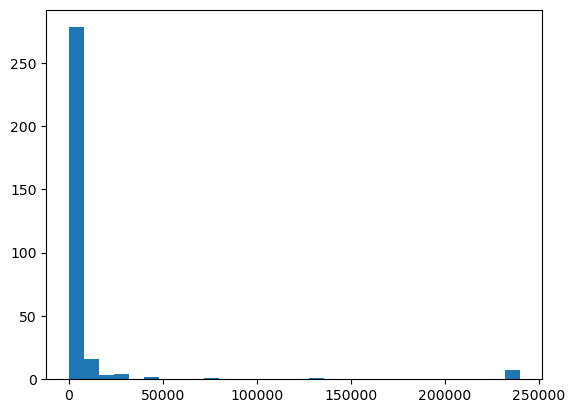

In [85]:
plt.hist(Ecoli_df[Ecoli_df.StationCode == "BCE_MCC"].Result, bins=30)

(array([65., 55., 39., 35., 12., 16.,  7.,  3.,  7.,  6.]),
 array([   0. ,  302.5,  605. ,  907.5, 1210. , 1512.5, 1815. , 2117.5,
        2420. , 2722.5, 3025. ]),
 <BarContainer object of 10 artists>)

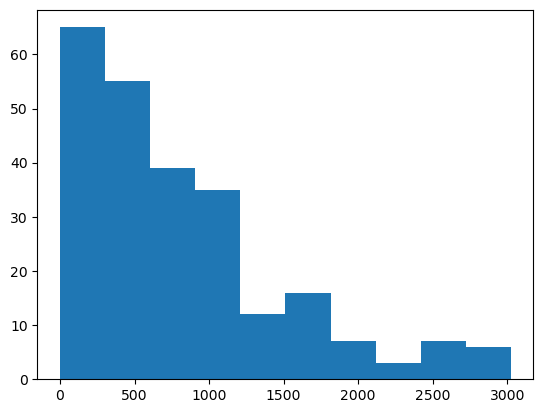

In [86]:
plt.hist(Ecoli_df[Ecoli_df.StationCode == "BCE_MCC"].Result, range=[0,3025])

In [87]:
pd.set_option('display.max_rows', 323)

In [88]:
Focus_df['Result'].isna().sum()

np.int64(0)

In [89]:
for x in station_array:
    print(x + ':     ' + str(Ecoli_df[Ecoli_df.StationCode == x].Result.mean()))

BCE_PAC:     5334.391025641025
DRL-BCE:     2583.3333333333335
BCE_MCC:     8637.403846153846
CC_ING:     4681.76282051282
CC_CEN:     nan
BC_02_ING:     4227.307692307692
SC_CUL:     3111.346153846154
BC_02_SAW:     11240.0
BC_01_NAT:     nan
BCC_DUQ:     1987.3397435897436
BC_01_WAS:     3814.935064935065
SC_SW_WAS:     9088.888888888889
BC_SW_FAI:     18439.444444444445
CC_SW_LAC:     24676.470588235294
BCE_CUL:     310.0
BC-020:     708.8888888888889
BC-032:     8214.25
BCE-1:     nan
BCE-2:     nan
BCE-3:     nan
BCE-4:     nan


Average E.coli counts for each station

In [90]:
for x in station_array:
    print(x + '\n mean:   ' + str(Ecoli_df[Ecoli_df.StationCode == x].Result.mean()) + '\n median:   ' + str(Ecoli_df[Ecoli_df.StationCode == x].Result.median()) + '\n std:   ' + str((Ecoli_df[Ecoli_df.StationCode == x].Result.std())) + '\n mode: \n' + str(Ecoli_df[Ecoli_df.StationCode == x].Result.mode().to_numpy()) + '\n')

BCE_PAC
 mean:   5334.391025641025
 median:   100.0
 std:   29963.015524249364
 mode: 
[100.]

DRL-BCE
 mean:   2583.3333333333335
 median:   100.0
 std:   17232.616921386878
 mode: 
[100.]

BCE_MCC
 mean:   8637.403846153846
 median:   860.0
 std:   36481.207468818866
 mode: 
[100.]

CC_ING
 mean:   4681.76282051282
 median:   1200.0
 std:   14744.615577299506
 mode: 
[100.]

CC_CEN
 mean:   nan
 median:   nan
 std:   nan
 mode: 
[]

BC_02_ING
 mean:   4227.307692307692
 median:   845.0
 std:   16331.4017193026
 mode: 
[100.]

SC_CUL
 mean:   3111.346153846154
 median:   630.0
 std:   10674.414015802311
 mode: 
[100.]

BC_02_SAW
 mean:   11240.0
 median:   7150.0
 std:   14357.764690109381
 mode: 
[13000. 16000. 17000.]

BC_01_NAT
 mean:   nan
 median:   nan
 std:   nan
 mode: 
[]

BCC_DUQ
 mean:   1987.3397435897436
 median:   410.0
 std:   7320.004983918313
 mode: 
[100.]

BC_01_WAS
 mean:   3814.935064935065
 median:   750.0
 std:   15573.130193858182
 mode: 
[100. 200.]

SC_SW_WAS

Mean, Median, Mode, STD for each station for E.Coli over 4 years measured

In [91]:
for x in station_array:
    print(x + '\n' + str(Ecoli_df[Ecoli_df.StationCode == x].Result.describe()) + '\n')

BCE_PAC
count       312.000000
mean       5334.391026
std       29963.015524
min         100.000000
25%         100.000000
50%         100.000000
75%         100.000000
max      240000.000000
Name: Result, dtype: float64

DRL-BCE
count       312.000000
mean       2583.333333
std       17232.616921
min         100.000000
25%         100.000000
50%         100.000000
75%         100.000000
max      240000.000000
Name: Result, dtype: float64

BCE_MCC
count       312.000000
mean       8637.403846
std       36481.207469
min         100.000000
25%         310.000000
50%         860.000000
75%        2525.000000
max      240000.000000
Name: Result, dtype: float64

CC_ING
count       312.000000
mean       4681.762821
std       14744.615577
min         100.000000
25%         510.000000
50%        1200.000000
75%        3300.000000
max      160000.000000
Name: Result, dtype: float64

CC_CEN
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Na

********************************

In [92]:
Focus_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
1,SC_CUL,Ammonia as N,0.07,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
2,BC-020,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
3,BC-032,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
4,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
...,...,...,...,...,...,...,...,...,...,...,...
8620,BCE_PAC,Total PCBs,6.5,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
8621,DRL-BCE,Enterococcus,80%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8622,DRL-BCE,Enterococcus,40%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8623,DRL-BCE,Enterococcus,75%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN


In [93]:
result_array = Focus_df.Result.unique()

In [94]:
result_array

array([0.05, 0.07, 0.08, ..., '6.5', '80%', '75%'],
      shape=(1905,), dtype=object)

In [95]:
not_float_array = []

for item in result_array:
    try:
        float(item)
    except ValueError:  
        not_float_array.append(item)  

In [96]:
not_float_array

['20%', '50%', '25%', '60%', '100%', '40%', '80%', '75%']

In [97]:
j =Focus_df[(Focus_df.Result == 'No Sample') | (Focus_df.Result == 'Analyst Error') | (Focus_df.Result == 'Not Analyzed') ].index


In [98]:
j

Index([], dtype='int64')

In [99]:
Focus_df =Focus_df.drop(j).reset_index(drop=True)

In [100]:
Focus_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
1,SC_CUL,Ammonia as N,0.07,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
2,BC-020,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
3,BC-032,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
4,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
...,...,...,...,...,...,...,...,...,...,...,...
8620,BCE_PAC,Total PCBs,6.5,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
8621,DRL-BCE,Enterococcus,80%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8622,DRL-BCE,Enterococcus,40%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8623,DRL-BCE,Enterococcus,75%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN


In [101]:
def replace_with(value):
    if isinstance(value, str) and value.startswith('<'):
        return float(value[1:])
    elif isinstance(value, str) and value.startswith('>'):
        return float(value[1:])
    elif isinstance(value, str) and value.endswith('DNQ'):
        return float(value.replace('DNQ', ''))
    return value


    


Focus_df.Result = Focus_df.Result.apply(replace_with)

In [102]:
Focus_df.Result

0       0.05
1       0.07
2       0.05
3       0.05
4       0.05
        ... 
8620     6.5
8621     80%
8622     40%
8623     75%
8624     50%
Name: Result, Length: 8625, dtype: object

Drop NAN (not a number) from data

In [103]:
Focus_df = Focus_df.dropna(subset=['Result']).reset_index(drop=True)

In [104]:
Focus_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
1,SC_CUL,Ammonia as N,0.07,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
2,BC-020,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
3,BC-032,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
4,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
...,...,...,...,...,...,...,...,...,...,...,...
8620,BCE_PAC,Total PCBs,6.5,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
8621,DRL-BCE,Enterococcus,80%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8622,DRL-BCE,Enterococcus,40%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
8623,DRL-BCE,Enterococcus,75%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN


In [105]:
Focus_df.loc[0:7955, ['StationCode','AnalyteName','Result', 'UnitName','WeatherCondition', 'SampleDate']]

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate
0,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT
1,SC_CUL,Ammonia as N,0.07,mg/L,Dry,NaT
2,BC-020,Ammonia as N,0.05,mg/L,Dry,NaT
3,BC-032,Ammonia as N,0.05,mg/L,Dry,NaT
4,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT
...,...,...,...,...,...,...
7951,DRL-BCE,E. coli,100.0,MPN/100 mL,Dry,NaT
7952,DRL-BCE,Enterococcus,10.0,MPN/100 mL,Dry,NaT
7953,DRL-BCE,Total coliform,100,MPN/100 mL,Dry,NaT
7954,BC_01_WAS,E. coli,15000,MPN/100 mL,Wet,NaT


In [106]:
# Would generate a summary of all, too Long

# Focus_df['Result'] = pd.to_numeric(Focus_df['Result'], errors='coerce')

# grouped = Focus_df.groupby(['AnalyteName', 'StationCode'])

# for (analyte, station), group in grouped:
#     numeric_results = group['Result']
    
#     count = numeric_results.count()
#     mean = numeric_results.mean()
#     std = numeric_results.std()
#     min_val = numeric_results.min()
#     percentiles = np.percentile(numeric_results, [25, 50, 75])
#     max_val = numeric_results.max()

#     print(f"AnalyteName: {analyte}")
#     print(f"Station Code: {station}")
#     print(f"count {count:.5f}")
#     print(f"mean {mean:.5f}")
#     print(f"std {std:.5f}")
#     print(f"min {min_val:.5f}")
#     print(f"25% {percentiles[0]:.5f}")
#     print(f"50% {percentiles[1]:.5f}")
#     print(f"75% {percentiles[2]:.5f}")
#     print(f"max {max_val:.5f}")
#     print("Name: Result, dtype: float64\n")

In [107]:
Focus_df.StationCode.unique()

array(['BC_02_SAW', 'SC_CUL', 'BC-020', 'BC-032', 'BC_01_NAT',
       'BC_02_ING', 'CC_CEN', 'BC_SW_FAI', 'CC_SW_LAC', 'SC_SW_WAS',
       'BCE_PAC', 'BCE_CUL', 'BC_01_WAS', 'BCC_DUQ', 'CC_ING', 'BCE_MCC',
       'DRL-BCE', 'BCE-1', 'BCE-2', 'BCE-3', 'BCE-4'], dtype=object)

In [108]:
Focus_df.StationCode.value_counts()

StationCode
BCE_PAC      1282
DRL-BCE       952
BCE_MCC       937
CC_ING        935
CC_CEN        732
BC_02_ING     654
SC_CUL        580
BC_02_SAW     392
BC_01_NAT     322
BCC_DUQ       312
BC_01_WAS     308
SC_SW_WAS     290
BC_SW_FAI     279
CC_SW_LAC     262
BC-032        153
BC-020        100
BCE_CUL        78
BCE-2          15
BCE-3          15
BCE-4          15
BCE-1          12
Name: count, dtype: int64

*************************************************

BCE_MCC and CC_CEN merge to flow out to BCE_PAC, create limited dataset with 3 stations

In [109]:
k =Focus_df[(Focus_df.StationCode == 'BCE_PAC') | (Focus_df.StationCode == 'CC_CEN') | (Focus_df.StationCode == 'BCE_MCC') ].index


In [110]:
k

Index([  12,   13,   21,   22,   30,   31,   35,   40,   47,   54,
       ...
       8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619, 8620],
      dtype='int64', length=2951)

In [111]:
Three_station_df =Focus_df.iloc[k].reset_index(drop=True)

In [112]:
Three_station_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,CC_CEN,Cadmium,0.59,ug/L,Wet,NaT,Sample Water,NaN,NaN,0.03,0.2
1,CC_CEN,Cadmium,1.067,ug/g ww,Wet,NaT,Stormborne Sediment,NaN,NaN,NaN,NaN
2,CC_CEN,Cadmium,0.33,ug/L,Wet,NaT,Sample Water,NaN,NaN,0.03,0.2
3,CC_CEN,Cadmium,0.564,ug/g ww,Wet,NaT,Stormborne Sediment,NaN,NaN,NaN,NaN
4,CC_CEN,Cadmium,0.29,ug/L,Wet,NaT,Sample Water,NaN,NaN,0.03,0.2
...,...,...,...,...,...,...,...,...,...,...,...
2946,BCE_PAC,Total DDTs,19.35,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
2947,BCE_PAC,Total-CHLORDANE,0,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
2948,BCE_PAC,Total PCBs,1.44,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
2949,BCE_PAC,Total DDTs,4.55,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN


In [113]:
Three_station_df.StationCode.value_counts()

StationCode
BCE_PAC    1282
BCE_MCC     937
CC_CEN      732
Name: count, dtype: int64

In [114]:
# would summarize 3 stations

# Three_station_df['Result'] = pd.to_numeric(Three_station_df['Result'], errors='coerce')

# grouped = Three_station_df.groupby(['AnalyteName', 'StationCode'])

# for (analyte, station), group in grouped:
#     numeric_results = group['Result']
    
#     count = numeric_results.count()
#     mean = numeric_results.mean()
#     std = numeric_results.std()
#     min_val = numeric_results.min()
#     percentiles = np.percentile(numeric_results, [25, 50, 75])
#     max_val = numeric_results.max()

#     print(f"AnalyteName: {analyte}")
#     print(f"Station Code: {station}")
#     print(f"count {count:.5f}")
#     print(f"mean {mean:.5f}")
#     print(f"std {std:.5f}")
#     print(f"min {min_val:.5f}")
#     print(f"25% {percentiles[0]:.5f}")
#     print(f"50% {percentiles[1]:.5f}")
#     print(f"75% {percentiles[2]:.5f}")
#     print(f"max {max_val:.5f}")
#     print("Name: Result, dtype: float64\n")

***************************************

****************************************

In [115]:
Focus_df.StationCode.value_counts()

StationCode
BCE_PAC      1282
DRL-BCE       952
BCE_MCC       937
CC_ING        935
CC_CEN        732
BC_02_ING     654
SC_CUL        580
BC_02_SAW     392
BC_01_NAT     322
BCC_DUQ       312
BC_01_WAS     308
SC_SW_WAS     290
BC_SW_FAI     279
CC_SW_LAC     262
BC-032        153
BC-020        100
BCE_CUL        78
BCE-2          15
BCE-3          15
BCE-4          15
BCE-1          12
Name: count, dtype: int64

BCE_PAC, BCE-2, BCE-3, BCE-1 are for same location, so combine
with new dataframe Final_df
    

In [116]:
Final_df = Focus_df

In [117]:
Final_df['StationCode'] = Final_df['StationCode'].replace('BCE-2', 'BCE_PAC')

In [118]:
Final_df['StationCode'] = Final_df['StationCode'].replace('BCE-3', 'BCE_PAC')

In [119]:
Final_df['StationCode'] = Final_df['StationCode'].replace('BCE-1', 'BCE_PAC')

focus on the these stations:
station_array = ['BC_01_WAS', 'BC_01_NAT', 'BCC_DUQ', 'SC_CUL', 'BC_02_SAW', 'BC_02_ING', 'BCE_MCC', 'CC_ING', 'CC_CEN', 'BCE_CUL', 'BCE-4', 'BCE_PAC', 'DRL-BCE']

In [120]:
station_array = ['BC_01_WAS', 'BC_01_NAT', 'BCC_DUQ', 'SC_CUL', 'BC_02_SAW', 'BC_02_ING', 'BCE_MCC', 'CC_ING', 'CC_CEN', 'BCE_CUL', 'BCE-4', 'BCE_PAC', 'DRL-BCE']

In [121]:
Final_df = Final_df.loc[Final_df.StationCode.isin(station_array)].reset_index(drop = True)

In [122]:
len(station_array)

13

**********************************BACTERIA**********************

focus on bacteria ["E. coli", "Enterococcus", "Total coliform"

In [123]:
bacteria = ["E. coli", "Enterococcus", "Total coliform"]

In [124]:
Bacteria_df = Final_df.loc[Final_df.AnalyteName.isin(bacteria)].reset_index(drop = True)

In [125]:
Bacteria_df['Result'] = pd.to_numeric(Bacteria_df['Result'], errors = 'coerce')

grouped = Bacteria_df.groupby(['AnalyteName', 'StationCode'])

for (analyte, station), group in grouped:
    numeric_results = group['Result']
    
    count = numeric_results.count()
    mean = numeric_results.mean()
    std = numeric_results.std()
    min_val = numeric_results.min()
    percentiles = np.percentile(numeric_results, [25, 50, 75])
    max_val = numeric_results.max()

    print(f"AnalyteName: {analyte}")
    print(f"Station Code: {station}")
    print(f"count {count:.5f}")
    print(f"mean {mean:.5f}")
    print(f"std {std:.5f}")
    print(f"min {min_val:.5f}")
    print(f"25% {percentiles[0]:.5f}")
    print(f"50% {percentiles[1]:.5f}")
    print(f"75% {percentiles[2]:.5f}")
    print(f"max {max_val:.5f}")
    print("Name: Result, dtype: float64\n")

AnalyteName: E. coli
Station Code: BCC_DUQ
count 312.00000
mean 1987.33974
std 7320.00498
min 100.00000
25% 200.00000
50% 410.00000
75% 1010.00000
max 100000.00000
Name: Result, dtype: float64

AnalyteName: E. coli
Station Code: BCE_CUL
count 4.00000
mean 310.00000
std 356.46412
min 100.00000
25% 100.00000
50% 150.00000
75% 360.00000
max 840.00000
Name: Result, dtype: float64

AnalyteName: E. coli
Station Code: BCE_MCC
count 312.00000
mean 8637.40385
std 36481.20747
min 100.00000
25% 310.00000
50% 860.00000
75% 2525.00000
max 240000.00000
Name: Result, dtype: float64

AnalyteName: E. coli
Station Code: BCE_PAC
count 312.00000
mean 5334.39103
std 29963.01552
min 100.00000
25% 100.00000
50% 100.00000
75% 100.00000
max 240000.00000
Name: Result, dtype: float64

AnalyteName: E. coli
Station Code: BC_01_WAS
count 308.00000
mean 3814.93506
std 15573.13019
min 100.00000
25% 310.00000
50% 750.00000
75% 2000.00000
max 240000.00000
Name: Result, dtype: float64

AnalyteName: E. coli
Station Code:

********************METAL************************

In [126]:
metals = ['Copper', 'Zinc', 'Lead', 'MERCURY', 'Cadmium', 'SILVER', 'Selenium', 'Nickel']

In [127]:
Metal_df = Final_df.loc[Final_df.AnalyteName.isin(metals)].reset_index(drop = True)


In [128]:
# Metal_df['Result'] = pd.to_numeric(Metal_df['Result'], errors = 'coerce')

# grouped = Metal_df.groupby(['AnalyteName', 'StationCode'])

# for (analyte, station), group in grouped:
#     numeric_results = group['Result']
    
#     count = numeric_results.count()
#     mean = numeric_results.mean()
#     std = numeric_results.std()
#     min_val = numeric_results.min()
#     percentiles = np.percentile(numeric_results, [25, 50, 75])
#     max_val = numeric_results.max()

#     print(f"AnalyteName: {analyte}")
#     print(f"Station Code: {station}")
#     print(f"count {count:.5f}")
#     print(f"mean {mean:.5f}")
#     print(f"std {std:.5f}")
#     print(f"min {min_val:.5f}")
#     print(f"25% {percentiles[0]:.5f}")
#     print(f"50% {percentiles[1]:.5f}")
#     print(f"75% {percentiles[2]:.5f}")
#     print(f"max {max_val:.5f}")
#     print("Name: Result, dtype: float64\n")

*********************PESTICIDE**********************

In [129]:
Pesticides =  ['Total DDTs', 'Total-CHLORDANE', 'Total PCBs','Total PAHs']

In [130]:
Pesticides_df = Final_df.loc[Final_df.AnalyteName.isin(Pesticides)].reset_index(drop = True)

In [131]:
Pesticides_df['Result'] = pd.to_numeric(Pesticides_df['Result'], errors = 'coerce')

grouped = Pesticides_df.groupby(['AnalyteName', 'StationCode'])

for (analyte, station), group in grouped:
    numeric_results = group['Result']
    
    count = numeric_results.count()
    mean = numeric_results.mean()
    std = numeric_results.std()
    min_val = numeric_results.min()
    percentiles = np.percentile(numeric_results, [25, 50, 75])
    max_val = numeric_results.max()

    print(f"AnalyteName: {analyte}")
    print(f"Station Code: {station}")
    print(f"count {count:.5f}")
    print(f"mean {mean:.5f}")
    print(f"std {std:.5f}")
    print(f"min {min_val:.5f}")
    print(f"25% {percentiles[0]:.5f}")
    print(f"50% {percentiles[1]:.5f}")
    print(f"75% {percentiles[2]:.5f}")
    print(f"max {max_val:.5f}")
    print("Name: Result, dtype: float64\n")

AnalyteName: Total DDTs
Station Code: BCE-4
count 5.00000
mean 2.81400
std 2.09249
min 0.00000
25% 2.09000
50% 2.42000
75% 4.01000
max 5.55000
Name: Result, dtype: float64

AnalyteName: Total DDTs
Station Code: BCE_CUL
count 6.00000
mean 4.43433
std 3.40985
min 1.62000
25% 2.31025
50% 3.45550
75% 4.79875
max 10.90000
Name: Result, dtype: float64

AnalyteName: Total DDTs
Station Code: BCE_PAC
count 43.00000
mean 7.18502
std 9.49402
min 0.00000
25% 0.00000
50% 4.27000
75% 8.90500
max 48.20000
Name: Result, dtype: float64

AnalyteName: Total DDTs
Station Code: BC_02_ING
count 16.00000
mean 15311.50441
std 26711.78675
min 10.52100
25% 44.44500
50% 154.80263
75% 20765.55200
max 88804.08000
Name: Result, dtype: float64

AnalyteName: Total DDTs
Station Code: BC_02_SAW
count 8.00000
mean 0.63750
std 1.80312
min 0.00000
25% 0.00000
50% 0.00000
75% 0.00000
max 5.10000
Name: Result, dtype: float64

AnalyteName: Total DDTs
Station Code: CC_CEN
count 26.00000
mean 22557.14525
std 46064.00372
min 0.

***********************AMMONIA

In [132]:
Ammonia = ['Ammonia as N']

In [133]:
Ammonia_df = Final_df.loc[Final_df.AnalyteName.isin(Ammonia)].reset_index(drop = True)

In [134]:
Ammonia_df['Result'] = pd.to_numeric(Ammonia_df['Result'], errors = 'coerce')

grouped = Ammonia_df.groupby(['AnalyteName', 'StationCode'])

for (analyte, station), group in grouped:
    numeric_results = group['Result']
    
    count = numeric_results.count()
    mean = numeric_results.mean()
    std = numeric_results.std()
    min_val = numeric_results.min()
    percentiles = np.percentile(numeric_results, [25, 50, 75])
    max_val = numeric_results.max()

    print(f"AnalyteName: {analyte}")
    print(f"Station Code: {station}")
    print(f"count {count:.5f}")
    print(f"mean {mean:.5f}")
    print(f"std {std:.5f}")
    print(f"min {min_val:.5f}")
    print(f"25% {percentiles[0]:.5f}")
    print(f"50% {percentiles[1]:.5f}")
    print(f"75% {percentiles[2]:.5f}")
    print(f"max {max_val:.5f}")
    print("Name: Result, dtype: float64\n")

AnalyteName: Ammonia as N
Station Code: BC_02_SAW
count 12.00000
mean 0.05500
std 0.01314
min 0.04000
25% 0.05000
50% 0.05000
75% 0.06000
max 0.08000
Name: Result, dtype: float64

AnalyteName: Ammonia as N
Station Code: SC_CUL
count 12.00000
mean 0.05500
std 0.01508
min 0.03000
25% 0.05000
50% 0.05000
75% 0.06250
max 0.08000
Name: Result, dtype: float64



************************************

************************************************

Ecoli_df.Result = Ecoli_df.Result.replace(['<100', '<1', '>240000'], [10, 0, 300000]).astype(float)

In [135]:
def replace_with(value):
    if isinstance(value, str) and value.startswith('<'):
        return float(value[1:])
    elif isinstance(value, str) and value.startswith('>'):
        return float(value[1:])
    elif isinstance(value, str) and value.endswith('DNQ'):
        return float(value.replace('DNQ', ''))
    return value


    


Final_df.Result = Final_df.Result.apply(replace_with)

In [136]:
Final_df.Result

0       0.05
1       0.07
2       0.05
3       0.05
4       0.82
        ... 
7536     6.5
7537     80%
7538     40%
7539     75%
7540     50%
Name: Result, Length: 7541, dtype: object

In [137]:
Final_df

,StationCode,AnalyteName,Result,UnitName,WeatherCondition,SampleDate,MatrixName,FractionName,ResQualCode,MDL,RL
0,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
1,SC_CUL,Ammonia as N,0.07,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
2,BC_02_SAW,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,ND,0.05,0.1
3,SC_CUL,Ammonia as N,0.05,mg/L,Dry,NaT,Sample Water,NaN,DNQ,0.05,0.1
4,BC_01_NAT,Cadmium,0.82,ug/L,Wet,NaT,Sample Water,NaN,NaN,0.03,0.2
...,...,...,...,...,...,...,...,...,...,...,...
7536,BCE_PAC,Total PCBs,6.5,ug/kg,Dry,NaT,Tissue,NaN,NaN,NaN,NaN
7537,DRL-BCE,Enterococcus,80%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
7538,DRL-BCE,Enterococcus,40%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN
7539,DRL-BCE,Enterococcus,75%,Monthly Exceed. Frequency,Dry/Wet,NaT,Sample Water,NaN,NaN,NaN,NaN


removed all strings and converted all <, >, and DNQ with approx vals

In [138]:
Final_df['Result'] = pd.to_numeric(Final_df['Result'], errors = 'coerce')

In [139]:
grouped = Final_df.groupby(['AnalyteName', 'StationCode'])

In [140]:
for (analyte, station), group in grouped:
    numeric_results = group['Result'].dropna()
    
    count = numeric_results.count()
    mean = numeric_results.mean()
    std = numeric_results.std()
    min_val = numeric_results.min()
    percentiles = np.percentile(numeric_results, [25, 50, 75])
    max_val = numeric_results.max()

    print(f"AnalyteName: {analyte}")
    print(f"Station Code: {station}")
    print(f"count {count:.6f}")
    print(f"mean {mean:.6f}")
    print(f"std {std:.6f}")
    print(f"min {min_val:.6f}")
    print(f"25% {percentiles[0]:.6f}")
    print(f"50% {percentiles[1]:.6f}")
    print(f"75% {percentiles[2]:.6f}")
    print(f"max {max_val:.6f}")
    print("Name: Result, dtype: float64\n")

AnalyteName: Ammonia as N
Station Code: BC_02_SAW
count 12.000000
mean 0.055000
std 0.013143
min 0.040000
25% 0.050000
50% 0.050000
75% 0.060000
max 0.080000
Name: Result, dtype: float64

AnalyteName: Ammonia as N
Station Code: SC_CUL
count 12.000000
mean 0.055000
std 0.015076
min 0.030000
25% 0.050000
50% 0.050000
75% 0.062500
max 0.080000
Name: Result, dtype: float64

AnalyteName: Cadmium
Station Code: BCE_CUL
count 9.000000
mean 25.319444
std 49.427872
min 0.085000
25% 0.260000
50% 0.550000
75% 0.800000
max 113.000000
Name: Result, dtype: float64

AnalyteName: Cadmium
Station Code: BCE_PAC
count 6.000000
mean 0.441667
std 0.190936
min 0.190000
25% 0.325000
50% 0.425000
75% 0.562500
max 0.710000
Name: Result, dtype: float64

AnalyteName: Cadmium
Station Code: BC_01_NAT
count 18.000000
mean 0.659444
std 0.468043
min 0.060000
25% 0.317500
50% 0.535000
75% 1.067500
max 1.630000
Name: Result, dtype: float64

AnalyteName: Cadmium
Station Code: BC_02_ING
count 37.000000
mean 627.403466
std